# Satire detection

This notebook trains models to detect satirical news headlines. The data used is taken from [Kaggle](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection).

## Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from scripts.text_processor import TextProcessor

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, f1_score

import pickle

## Data sourcing

In [2]:
headlines = pd.read_csv('./data/sarcasm_headlines.csv')

In [3]:
headlines.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Data cleaning

In [4]:
headlines.columns = ['text', 'satire']

## EDA

In [5]:
headlines.groupby('satire').count()

,text
satire,
0,29970
1,25358


## Data Processing

In [6]:
processor = TextProcessor()

headlines['tokens'] = headlines['text'].apply(processor.clean_text)

## Feature selection

In [7]:
X = headlines['tokens']
y = headlines['satire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1984)

In [8]:
vec = TfidfVectorizer(min_df=0.001, ngram_range=(1, 3))
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

## Modelling

### Decision tree

In [9]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=1984)

In [10]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1984)

In [11]:
y_pred = tree_model.predict(X_train)

In [12]:
print(f"Train F1 score: {f1_score(y_train, y_pred)}")

Train F1 score: 0.2753836651304224


In [13]:
y_pred = tree_model.predict(X_test)

In [14]:
print(f"Test F1 score: {f1_score(y_test, y_pred)}")

Test F1 score: 0.2646444664248819


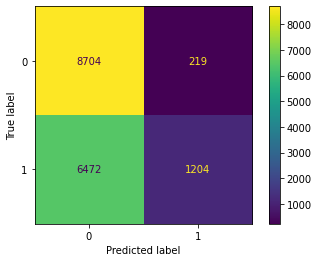

In [15]:
plot_confusion_matrix(tree_model, X_test, y_test)

### SVM

In [16]:
svm_model = SVC(random_state=1984, probability=True)

In [17]:
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=1984)

In [18]:
y_pred = svm_model.predict(X_train)

In [19]:
print(f"Train F1 score: {f1_score(y_train, y_pred)}")

Train F1 score: 0.949635730123535


In [20]:
y_pred = svm_model.predict(X_test)

In [21]:
print(f"Test F1 score: {f1_score(y_test, y_pred)}")

Test F1 score: 0.8476641841570751


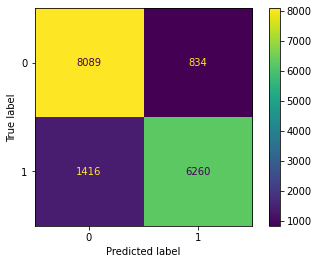

In [22]:
plot_confusion_matrix(svm_model, X_test, y_test)

## Exporting models

In [23]:
with open('./models/vectoriser', 'wb') as file:
    pickle.dump(vec, file)

In [24]:
with open('./models/tree-model', 'wb') as file:
    pickle.dump(tree_model, file)

In [25]:
with open('./models/svm-model', 'wb') as file:
    pickle.dump(svm_model, file)